In [3]:
import numpy as np
import pandas as pd
import time

In [5]:
df = pd.read_csv('Social_Network_Ads.csv')

In [7]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [9]:
df = df[['Age','EstimatedSalary','Purchased']]

In [19]:
df.shape

(400, 3)

In [11]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [15]:
X = df[["Age","EstimatedSalary"]]
y = df["Purchased"]

In [21]:
X.shape , y.shape

((400, 2), (400,))

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [25]:
X_scaled.shape

(400, 2)

In [27]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

# stocastic GD

In [29]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

C:\Users\parvez\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

In [35]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
#start = time.time()
history = model.fit(X_scaled,y,epochs=500,batch_size=1,validation_split=0.2)
#print(time.time() - start)

Epoch 1/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7518 - loss: 0.5839 - val_accuracy: 0.3625 - val_loss: 0.7879
Epoch 2/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7364 - loss: 0.4143 - val_accuracy: 0.6000 - val_loss: 0.6890
Epoch 3/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8236 - loss: 0.3537 - val_accuracy: 0.6250 - val_loss: 0.6001
Epoch 4/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8631 - loss: 0.3096 - val_accuracy: 0.7250 - val_loss: 0.5338
Epoch 5/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8577 - loss: 0.3108 - val_accuracy: 0.7500 - val_loss: 0.4726
Epoch 6/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8276 - loss: 0.3087 - val_accuracy: 0.7875 - val_loss: 0.4298
Epoch 7/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8533 - loss: 0.3149 - val_accuracy: 0.8125 - val_loss: 0.4001
Epoch 8/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8917 - loss: 0.2528 - val_accu

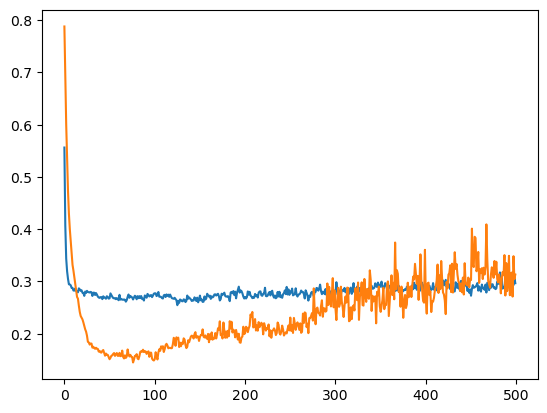

In [43]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

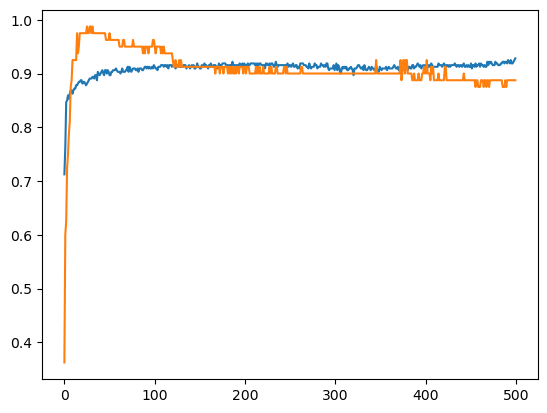

In [45]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

# Batch GD

In [80]:
model_1 = Sequential()

model_1.add(Dense(10,activation='relu',input_dim=2))
model_1.add(Dense(10,activation='relu'))
model_1.add(Dense(1,activation='sigmoid'))

C:\Users\parvez\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [82]:
model_1.compile(loss='binary_crossentropy',metrics=['accuracy'])
start = time.time()
history = model_1.fit(X_scaled,y,epochs=50,batch_size=250,validation_split=0.2)
print(time.time() - start)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step - accuracy: 0.7150 - loss: 0.6506 - val_accuracy: 0.3625 - val_loss: 0.8181
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.7110 - loss: 0.6352 - val_accuracy: 0.3625 - val_loss: 0.8111
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.7150 - loss: 0.6255 - val_accuracy: 0.3625 - val_loss: 0.8030
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.7203 - loss: 0.6139 - val_accuracy: 0.3625 - val_loss: 0.7951
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.7070 - loss: 0.6146 - val_accuracy: 0.3625 - val_loss: 0.7917
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.7097 - loss: 0.6055 - val_accuracy: 0.3625 - val_loss: 0.7879
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.7097 - loss: 0.6005 - val_accuracy: 0.3625 - val_loss: 0.7835
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.7137 - loss: 0.5945 - val_accuracy: 0.3625 - val_loss: 0.7781

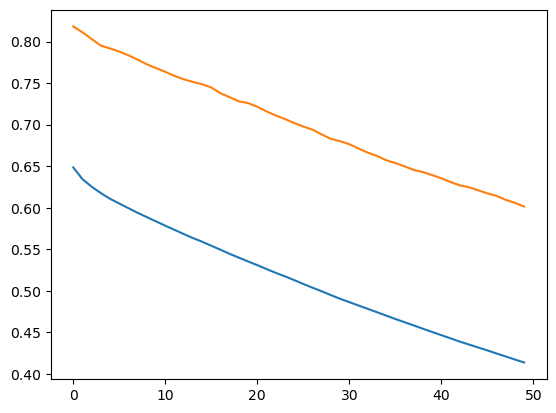

In [84]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

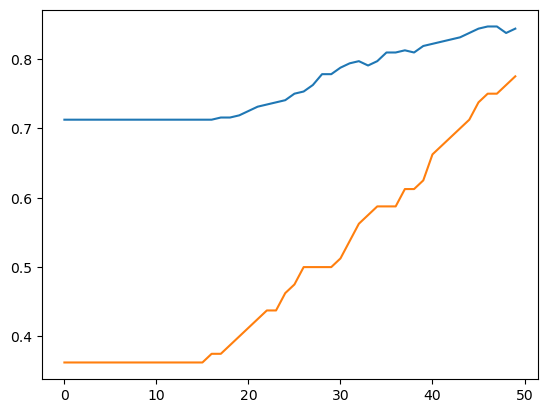

In [86]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

# Mini batch GD

In [89]:
model_3 = Sequential()

model_3.add(Dense(10,activation='relu',input_dim=2))
model_3.add(Dense(10,activation='relu'))
model_3.add(Dense(1,activation='sigmoid'))

C:\Users\parvez\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [91]:
model_3.compile(loss='binary_crossentropy',metrics=['accuracy'])
start = time.time()
history = model_3.fit(X_scaled,y,epochs=50,batch_size=32,validation_split=0.2)
print(time.time() - start)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6216 - loss: 0.6706 - val_accuracy: 0.6875 - val_loss: 0.6326
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7071 - loss: 0.6268 - val_accuracy: 0.7500 - val_loss: 0.6299
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7351 - loss: 0.6179 - val_accuracy: 0.7625 - val_loss: 0.6273
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7346 - loss: 0.6093 - val_accuracy: 0.7750 - val_loss: 0.6228
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7746 - loss: 0.5868 - val_accuracy: 0.7875 - val_loss: 0.6191
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7977 - loss: 0.5753 - val_accuracy: 0.7625 - val_loss: 0.6140
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8516 - loss: 0.5566 - val_accuracy: 0.7750 - val_loss: 0.6103
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8542 - loss: 0.5476 - val_accuracy: 0.7750 - val_loss

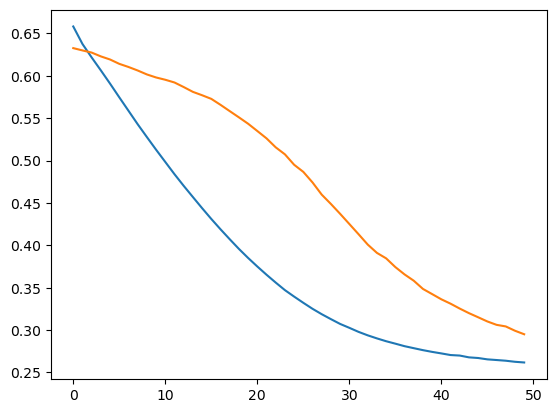

In [93]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

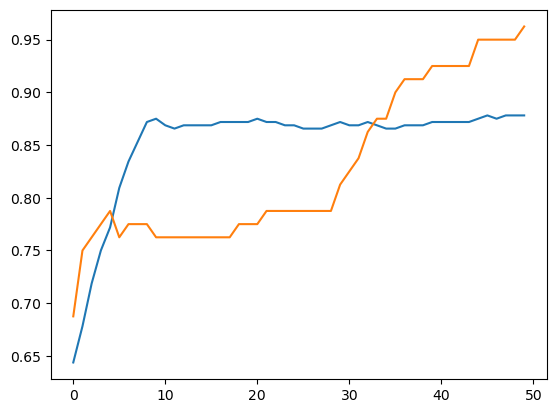

In [95]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])